In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from time import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

## Load Data

In [2]:
df = pd.read_csv('data/training.csv')

# Save to CSV

In [3]:
#df_step2_2.to_csv("data/value_df.csv")

# **EDA (exploratory data analysis ) --------------------------------------**

In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [8]:
df["CustomerId"].nunique()

3742

In [9]:
df["TransactionId"].nunique()

95662

In [10]:
print(df["FraudResult"].value_counts().to_frame())

   FraudResult
0        95469
1          193


## Removing string and change to integer

In [11]:
columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 
           'CustomerId', 'ProviderId', 'ProductId', 'ChannelId']

import re

for col in columns:
    df[col] = df[col].str.replace('\D', '')
    df[col] = df[col].apply(np.int64)

## Changing the Datetime
- and create new columns for **weekday, hour, day** 

In [12]:
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [13]:
df['Date'] = df['TransactionStartTime'].apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d' ))

In [14]:
# .weekday() 
df['weekday'] = df['TransactionStartTime'].dt.weekday

In [15]:
df["weekday"].nunique()

7

In [16]:
df['hour'] = df['TransactionStartTime'].dt.hour

In [17]:
df["hour"].nunique()

24

In [18]:
df['day'] = df['TransactionStartTime'].dt.day

In [19]:
df["day"].nunique()

31

## Drop useless Columns
- CurrencyCode, CountryCode

In [20]:
cols = ['CurrencyCode', 'CountryCode']
df.drop(cols, axis = 1, inplace = True)

## Looking at the Data with first Plots

**ProductCategory**

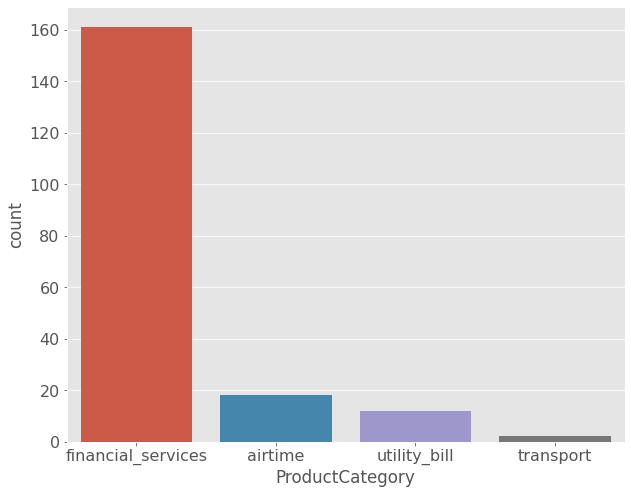

In [21]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10,8))
sns.countplot(x='ProductCategory',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**ProductId**

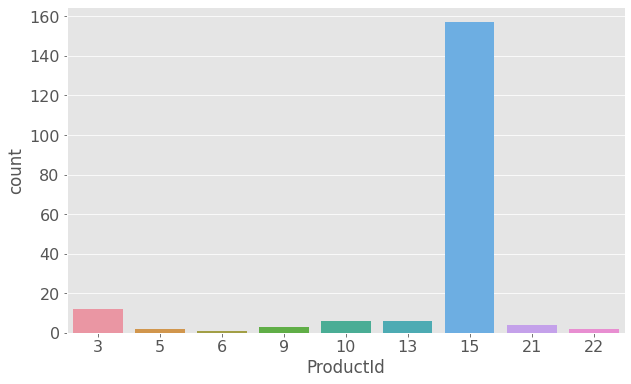

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='ProductId',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

#plt.savefig("ProductId.png")

**ProviderId**

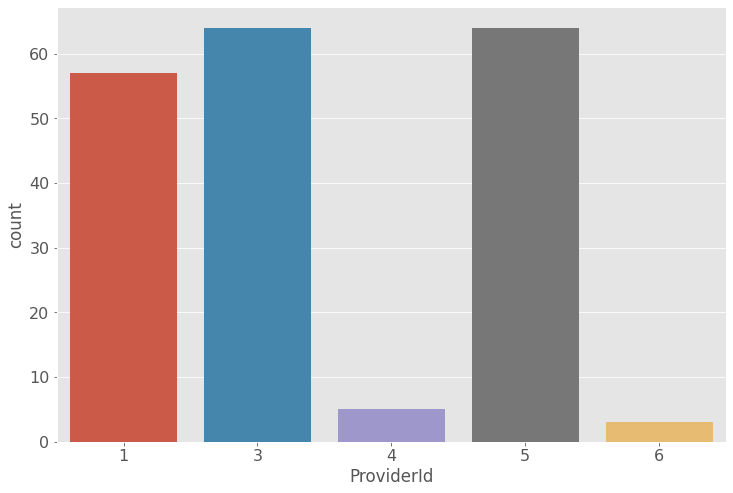

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='ProviderId',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**ChannelId**
- Fraudulent transactions mostly happen on one specific channel.

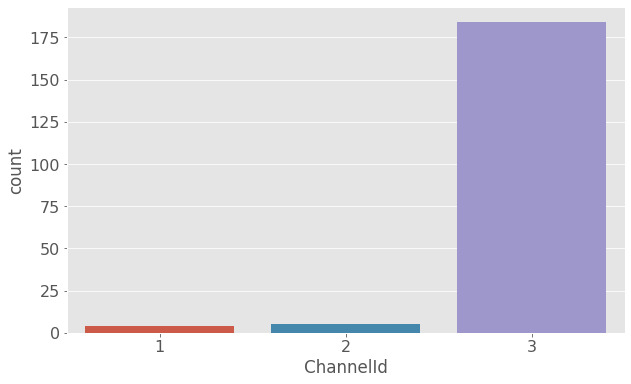

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='ChannelId',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**PricingStrategy**

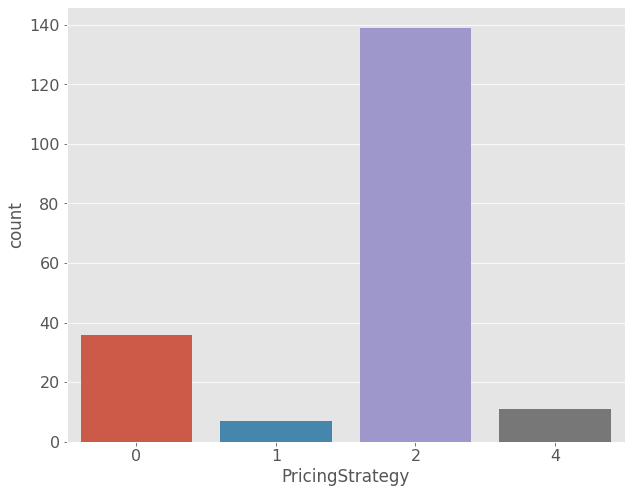

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='PricingStrategy',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Hour**

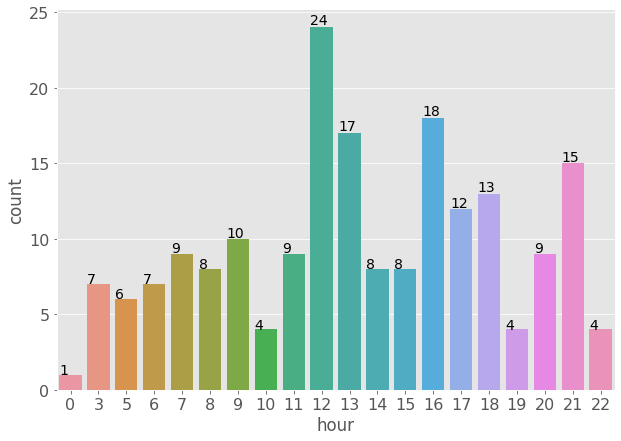

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='hour',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

**weekday**

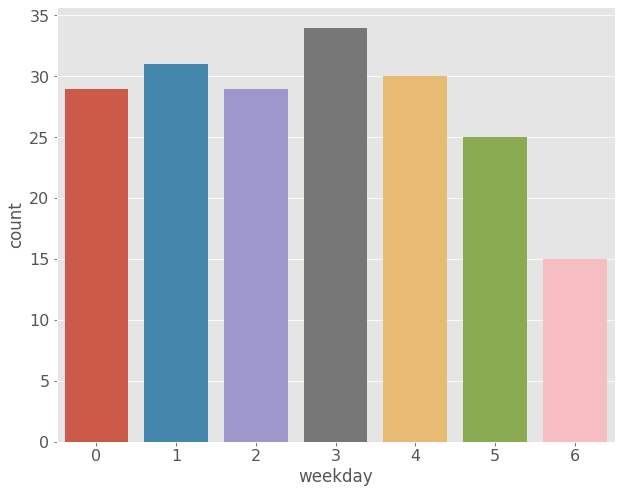

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x='weekday',data=df[df["FraudResult"] == 1])
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

# **Feature Engineering (aggregation)**

#### Example of **.unstack()**
- https://stackoverflow.com/questions/61052816/how-to-filter-dataframe-on-two-columns-and-output-cumulative-sum

- Looking at customer Ids

In [28]:
cf = df.groupby(["CustomerId", "Date"]).agg({"TransactionId": "count", "ProductId": "max",
                                      "ChannelId": "max", "Amount" : "mean",  "FraudResult": "sum"}).sort_values("CustomerId", ascending=False) 
display(cf.index[0])
display(cf["Amount"])
cf #.columns

(7479, '2019-02-01')

CustomerId  Date      
7479        2019-02-01      500.0
7478        2019-02-01      500.0
7477        2018-12-19    -2000.0
7476        2018-12-07   -10000.0
            2018-11-15    -1000.0
                           ...   
5           2018-11-21   -10000.0
4           2018-11-21   -10000.0
3           2018-11-21   -10000.0
2           2018-11-21   -10000.0
1           2018-11-21   -10000.0
Name: Amount, Length: 21872, dtype: float64

TransactionId  ProductId  ChannelId   Amount  \
CustomerId Date                                                       
7479       2019-02-01              1          9          1    500.0   
7478       2019-02-01              1          9          1    500.0   
7477       2018-12-19              1         10          2  -2000.0   
7476       2018-12-07              1          3          2 -10000.0   
           2018-11-15              1         10          2  -1000.0   
...                              ...        ...        ...      ...   
5          2018-11-21              1         10          2 -10000.0   
4          2018-11-21              1         10          2 -10000.0   
3          2018-11-21              1          3          2 -10000.0   
2          2018-11-21              1          3          2 -10000.0   
1          2018-11-21              1         10          2 -10000.0   

                       FraudResult  
CustomerId Date                     
7479       2019-02-01            0  
7478       2019-02-01            0  
7477       2018-12-19            0  
7476       2018-12-07            0  
           2018-11-15            0  
...                            ...  
5          2018-11-21            0  
4          2018-11-21            0  
3          2018-11-21            0  
2          2018-11-21            0  
1          2018-11-21            0  

[21872 rows x 5 columns]

# **Create new Dataset for aggregation**

- We take df and **create dummies** with drop_first=False

In [29]:
df_dummy = pd.get_dummies(df, columns=["ProviderId", "ProductId", "ChannelId", "PricingStrategy"], drop_first=False)
df_dummy.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProductCategory', 'Amount', 'Value', 'TransactionStartTime',
       'FraudResult', 'Date', 'weekday', 'hour', 'day', 'ProviderId_1',
       'ProviderId_2', 'ProviderId_3', 'ProviderId_4', 'ProviderId_5',
       'ProviderId_6', 'ProductId_1', 'ProductId_2', 'ProductId_3',
       'ProductId_4', 'ProductId_5', 'ProductId_6', 'ProductId_7',
       'ProductId_8', 'ProductId_9', 'ProductId_10', 'ProductId_11',
       'ProductId_12', 'ProductId_13', 'ProductId_14', 'ProductId_15',
       'ProductId_16', 'ProductId_19', 'ProductId_20', 'ProductId_21',
       'ProductId_22', 'ProductId_23', 'ProductId_24', 'ProductId_27',
       'ChannelId_1', 'ChannelId_2', 'ChannelId_3', 'ChannelId_5',
       'PricingStrategy_0', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4'],
      dtype='object')

In [30]:
np.sort(df_dummy[df_dummy["CustomerId"] == 334]["Date"].unique())

array(['2018-11-16', '2018-11-23', '2018-11-30', '2018-12-07',
       '2018-12-14'], dtype=object)

### **Step 1: Create again new columns based on the old columns** 

- **fraud_cumsum:** shows us the count of fraud up to every timestamp by id

In [31]:
df_step1 = df_dummy.sort_values('TransactionStartTime', ascending=True)
df_step1["fraud_cumsum"] = df_dummy.groupby('CustomerId')['FraudResult'].cumsum() 

- **value_cumsum:** shows us the sum of Amount up to every timestamp by id

In [32]:
df_step1["value_cumsum"] = df_dummy.groupby('CustomerId')['Value'].cumsum()

- **transaction_cumsum:** shows us the sum of Transactions up to every timestamp by id

In [33]:
df_step1["transaction_cumsum"] = df_dummy.groupby('CustomerId')['TransactionId'].cumcount()+1

- **value_mean:** shows us the mean of the Amount by transactions up to every timestamp by id

In [34]:
df_step1["value_mean"] = df_step1["value_cumsum"]/df_step1["transaction_cumsum"]

### **Step 2.1: Create again new columns based on the new Dummies (mean by transaction of each column and id up to every timestamp)**

In [35]:
features = ['ProviderId_1', 'ProviderId_2', 'ProviderId_3', 'ProviderId_4', 
         'ProviderId_5', 'ProviderId_6', 'ProductId_1', 'ProductId_2',
           'ProductId_3', 'ProductId_4', 'ProductId_5', 'ProductId_6',
           'ProductId_7', 'ProductId_8', 'ProductId_9', 'ProductId_10',
           'ProductId_11', 'ProductId_12', 'ProductId_13', 'ProductId_14',
           'ProductId_15', 'ProductId_16', 'ProductId_19', 'ProductId_20',
           'ProductId_21', 'ProductId_22', 'ProductId_23', 'ProductId_24',
           'ProductId_27', 'ChannelId_1', 'ChannelId_2', 'ChannelId_3', 'ChannelId_5',
           'PricingStrategy_0', 'PricingStrategy_1', 'PricingStrategy_2', 'PricingStrategy_4']

df_step2_1 = df_step1.sort_values('TransactionStartTime', ascending=True).copy()
for f in features:
    df_step2_1[f] = df_dummy.groupby('CustomerId')[f].cumsum()/df_step1["transaction_cumsum"]

### **Step 2.2: Create new DF and new columns based on the new Dummies (mean by transaction of each column and id)** 

In [36]:
df_step2_2 = df_step1.sort_values('TransactionStartTime', ascending=True).copy()
for f in features:
    gb = df_dummy.groupby('CustomerId').agg({f: "sum","TransactionId": "count"}) 
    for g in gb.index:
        df_step2_2.loc[df_dummy['CustomerId'] == g, f] = gb[f][g]/gb["TransactionId"][g]

# Creating df_plot (based on original Dataframe):

In [37]:
df_plot = df.sort_values('TransactionStartTime', ascending=True).copy()
df_plot["fraud_cumsum"] = df.groupby('CustomerId')['FraudResult'].cumsum() 
df_plot["value_cumsum"] = df.groupby('CustomerId')['Value'].cumsum()
df_plot["transaction_cumsum"] = df.groupby('CustomerId')['TransactionId'].cumcount()+1
df_plot["value_mean"] = df_plot["value_cumsum"]/df_plot["transaction_cumsum"]

In [38]:
df_plot = df_plot.sort_values('TransactionStartTime', ascending=True).copy()
df_plot["fraud_total"] = 0
df_plot["Value_total"] = 0
df_plot["fraud"] = 0
df_plot["fraud_history"] = 0

gb = df_step2_2.groupby('CustomerId').agg({"Amount": "sum","FraudResult": "sum", "Value": "sum"})

for g in gb.index:
    if gb["FraudResult"][g] == 0:
        frauds = "No Frauds"
    elif gb["FraudResult"][g] == 1:
        frauds = "one Fraud"
    elif gb["FraudResult"][g] > 1:
        frauds = "several Frauds"
    
    df_plot.loc[df_plot['CustomerId'] == g, "fraud_total"] = gb["FraudResult"][g]
    df_plot.loc[df_plot['CustomerId'] == g, "Value_total"] = gb["Value"][g]
    df_plot.loc[df_plot['CustomerId'] == g, "fraud"] = 1 if gb["FraudResult"][g] > 0 else 0
    df_plot.loc[df_plot['CustomerId'] == g, "fraud_history"] = frauds  

In [39]:
df_plot.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Date', 'weekday', 'hour', 'day', 'fraud_cumsum', 'value_cumsum',
       'transaction_cumsum', 'value_mean', 'fraud_total', 'Value_total',
       'fraud', 'fraud_history'],
      dtype='object')

# **Plots with the new variables from the Feature Engineering**

**The higher the transaction-volume the higher the probability to be fraudulent.**

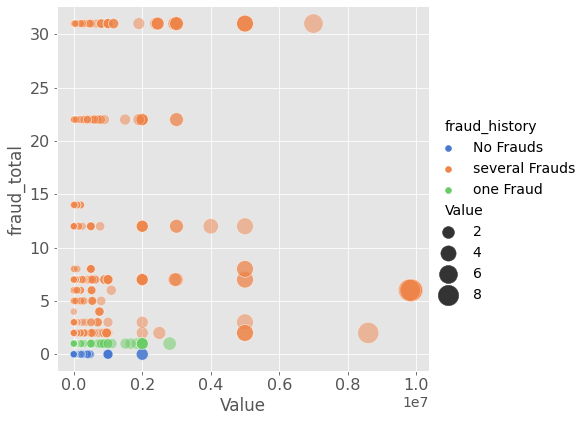

In [40]:
sns.relplot(x="Value", y="fraud_total", hue="fraud_history", size="Value",
            sizes=(50, 500), alpha=.5, palette="muted",
            height=6, data=df_plot)
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Value distribution of no frauds, one fraud and several frauds within a week**

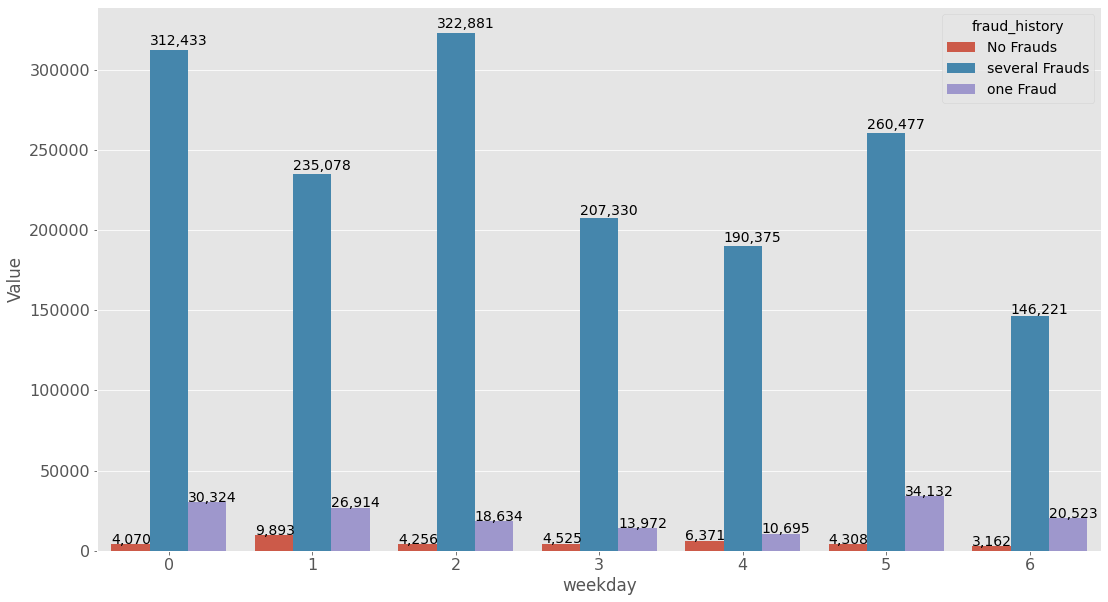

In [41]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x="weekday", y="Value", hue="fraud_history", data=df_plot, ci=None);
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Value distribution of no frauds, one fraud and several frauds within a day**

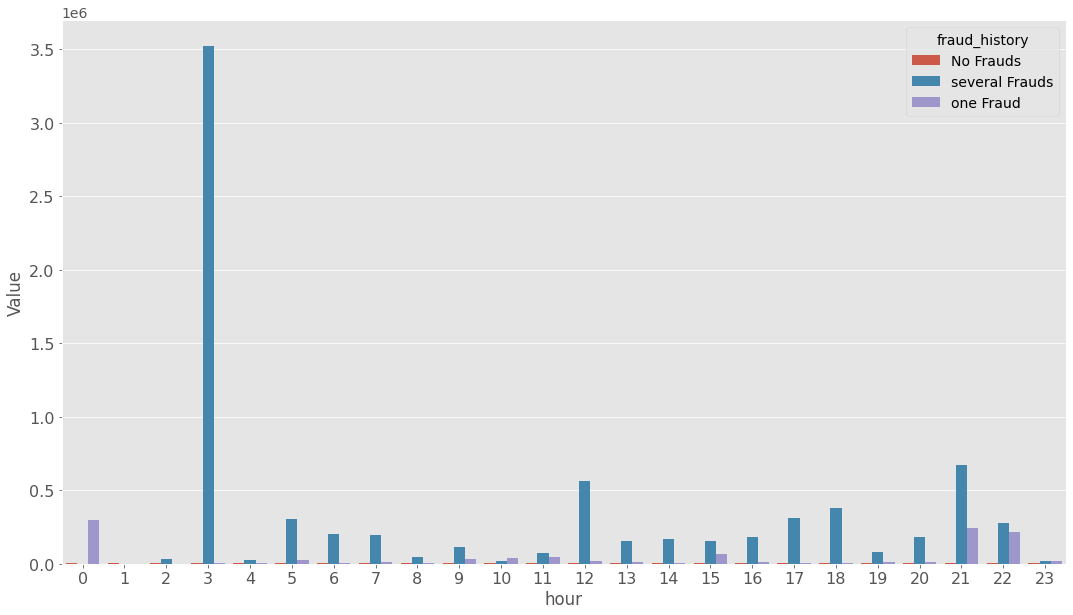

In [42]:
plt.figure(figsize=(18,10))
sns.barplot(x="hour", y="Value", hue="fraud_history", data=df_plot, ci=None);
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Value distribution of no frauds, one fraud and several frauds within the ProviderId**

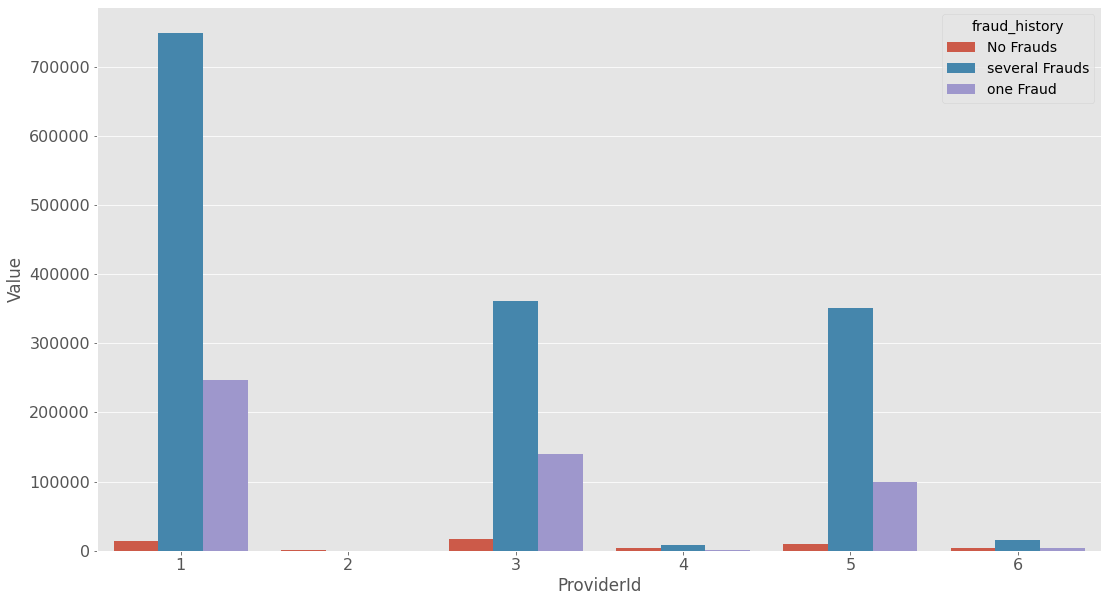

In [43]:
plt.figure(figsize=(18,10))
sns.barplot(x="ProviderId", y="Value", hue="fraud_history", data=df_plot, ci=None);
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Value distribution of no frauds, one fraud and several frauds within the ProductId**

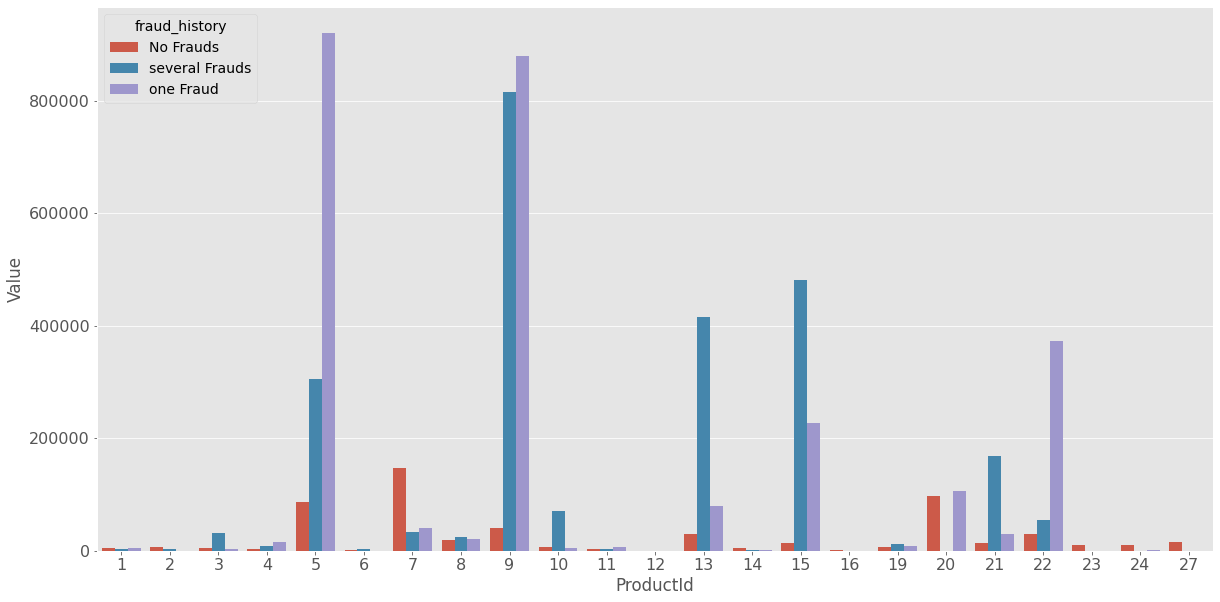

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x="ProductId", y="Value", hue="fraud_history", data=df_plot, ci=None);
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

**Value distribution of no frauds, one fraud and several frauds**

<AxesSubplot:xlabel='fraud_history', ylabel='Value'>

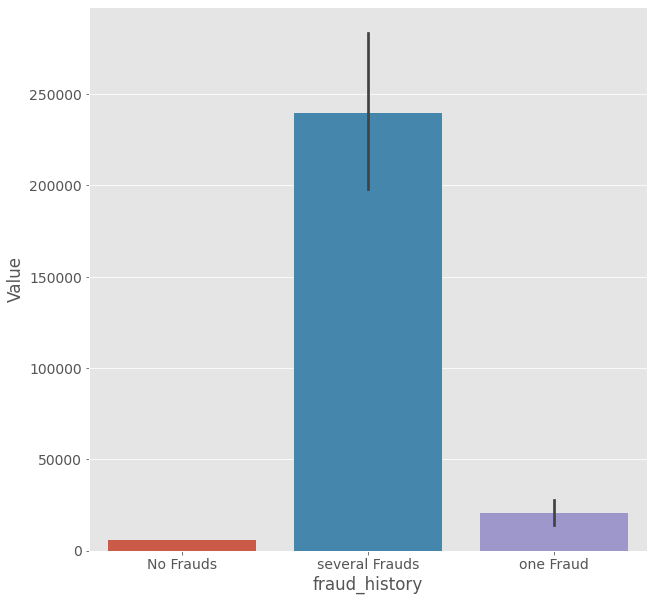

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(x="fraud_history", y="Value", data=df_plot)

## **Pieplots**

In [46]:
df_plot["fraud_history"].value_counts().to_frame()

,fraud_history
No Frauds,92091
one Fraud,1968
several Frauds,1603


In [47]:
df_plot.groupby('FraudResult').agg({"Value": "mean","CustomerId": "count", "TransactionId": "count"})

,Value,CustomerId,TransactionId
FraudResult,,,
0,6.763227e+03,95469,95469
1,1.561820e+06,193,193


**0.2% of all transactions are fraud.**

([<matplotlib.patches.Wedge at 0x1281014c0>,
 [Text(-1.1499773005690592, 0.007225522534683434, 'No Frauds (99.8%)'),
  Text(1.14997730115571, -0.007225429165779916, 'Fraud (0.2%)')])

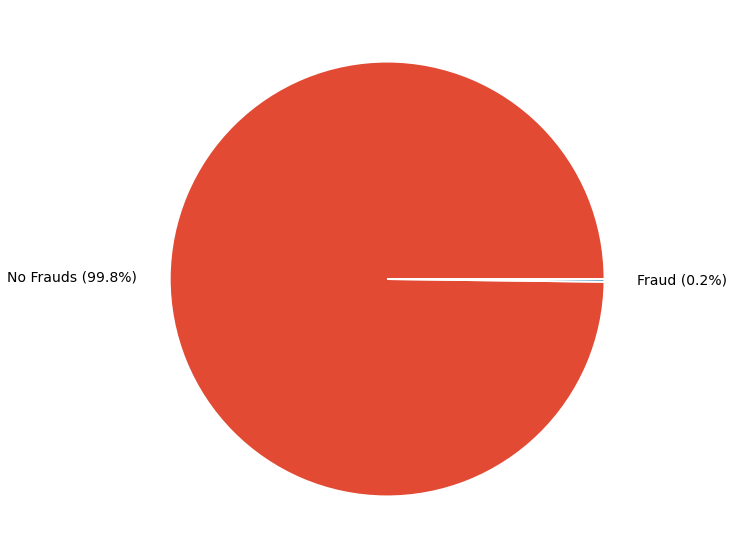

In [48]:
names='No Frauds (96.3%)', 'one Fraud (2%)', 'several Frauds (1.7%)'
values=[92091,1968 + 1603]
names='No Frauds (99.8%)', 'Fraud (0.2%)'
values=[99.8,0.2]
plt.figure(figsize=(12,10))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

**32% of the overall transaction value is 
fraud.**

([<matplotlib.patches.Wedge at 0x12904c550>,
 [Text(-0.6162008360441112, 0.9709771004810249, 'No Frauds (68%)'),
  Text(0.6162008360441107, -0.9709771004810253, 'Fraud (32%)')])

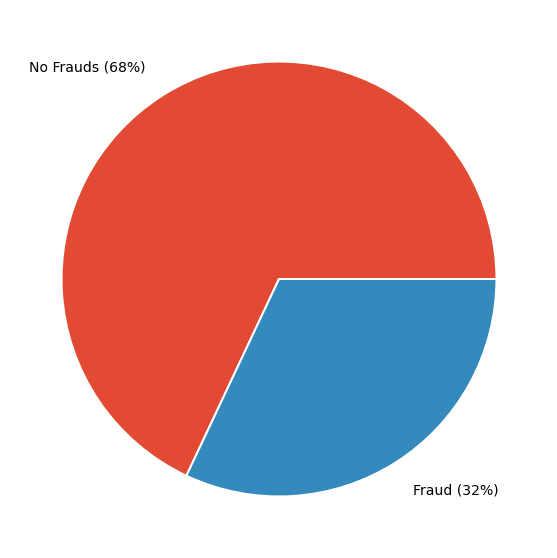

In [49]:
names='No Frauds (55.2%)', 'one Fraud (4.3%)', 'several Frauds (40.5%)'
values=[522512742,40620263,383976656]
names='No Frauds (68%)', 'Fraud (32%)'
values=[68,32]
plt.figure(figsize=(12,10))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })